# Importing Libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
#import data
data=pd.read_csv('kidney.csv')

In [3]:
#create dataframe
df = pd.DataFrame(data)

# EDA

In [4]:
#read the first 10 columns of data
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


**there are 26 columns and explanation of these columns:
age - age
bp - blood pressure
sg - specific gravity
al - albumin
su - sugar
rbc - red blood cells
pc - pus cell
pcc - pus cell clumps
ba - bacteria
bgr - blood glucose random
bu - blood urea
sc - serum creatinine
sod - sodium
pot - potassium
hemo - hemoglobin
pcv - packed cell volume
wc - white blood cell count
rc - red blood cell count
htn - hypertension
dm - diabetes mellitus
cad - coronary artery disease
appet - appetite
pe - pedal edema
ane - anemia
class - class**

In [5]:
#look at data types
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [6]:
#look at column names
columns_list = df.columns
columns_list

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
#lets look unique values of some categorical values
columns_of_interest = [ 'rbc', 'pc', 'pcc', 'ba', 
             'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']  

unique_values = df[columns_of_interest].apply(lambda x: x.unique())
print(unique_values)

rbc                         [nan, normal, abnormal]
pc                          [normal, abnormal, nan]
pcc                      [notpresent, present, nan]
ba                       [notpresent, present, nan]
htn                                  [yes, no, nan]
dm                [yes, no,  yes, \tno, \tyes, nan]
cad                            [no, yes, \tno, nan]
appet                             [good, poor, nan]
pe                                   [no, yes, nan]
ane                                  [no, yes, nan]
classification                 [ckd, ckd\t, notckd]
dtype: object


In [8]:
#i want to look at the number of value "ckd/t" in classification column
column_counts = df['classification'].value_counts()
column_counts

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [9]:
#write the function to replace some values due to label encoding
col_list = ['dm', 'cad', 'classification']  

# Iterate through each column and clean '\tno'
for col in col_list:
    df[col] = df[col].str.replace(r'\t', '').str.strip()

C:\Users\UNISOFT\AppData\Local\Temp\ipykernel_9636\230766684.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r'\t', '').str.strip()


In [10]:
#get info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [11]:
#look at shape
df.shape

(400, 26)

In [12]:
#look at statistical info
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [13]:
#since id column does not contain predictive information and is  random , it  doesn't contribute to the predictive power of your mode
#remove this columns
df.drop('id', axis = 1, inplace = True)

In [14]:
#transform columns names
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 
              'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [15]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [16]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


['age' 'blood_pressure' 'specific_gravity' 'albumin' 'sugar'
 'blood_glucose_random' 'blood_urea' 'serum_creatinine' 'sodium'
 'potassium' 'haemoglobin']


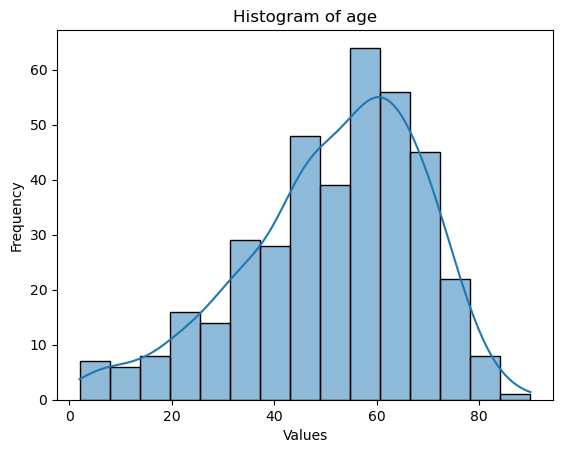

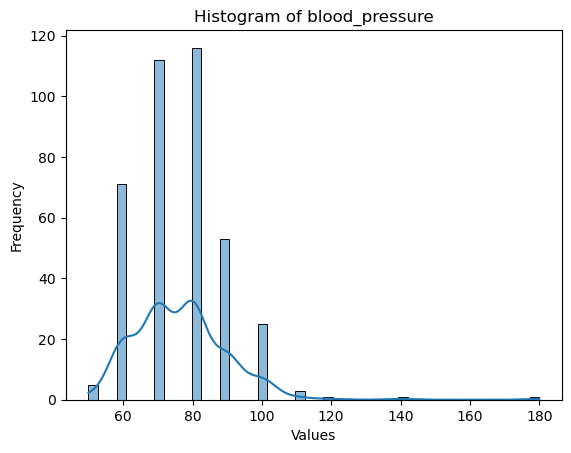

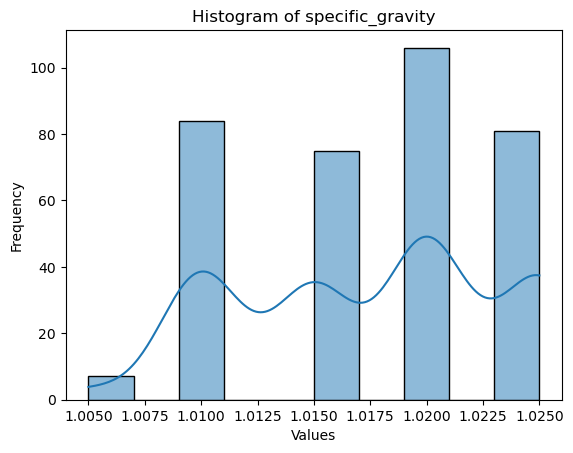

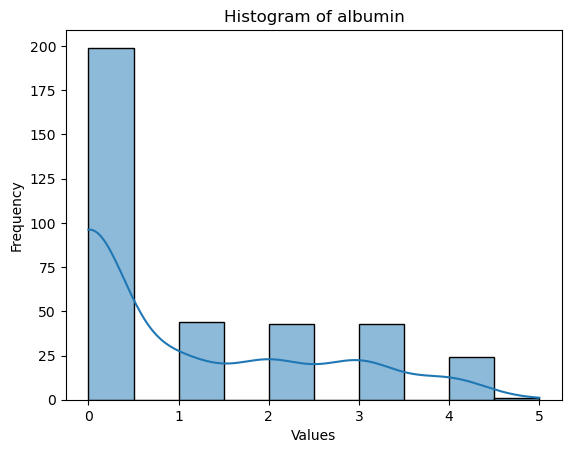

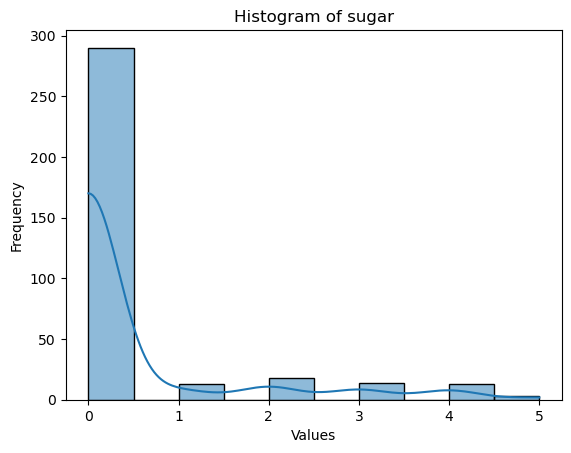

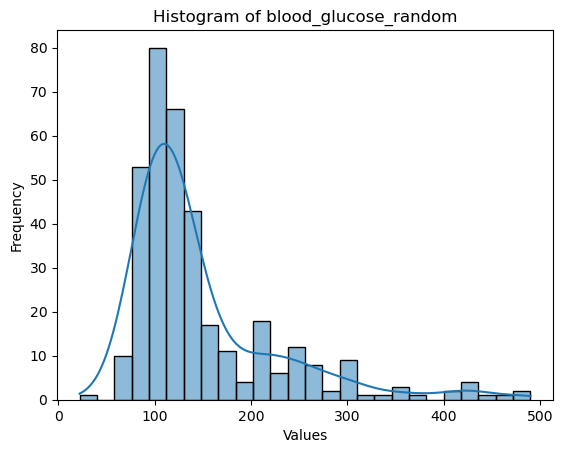

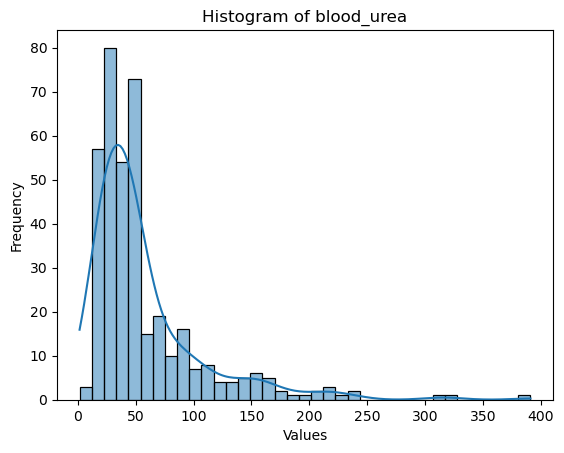

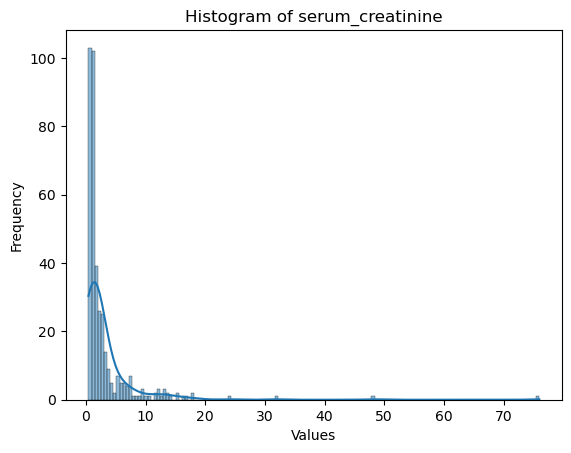

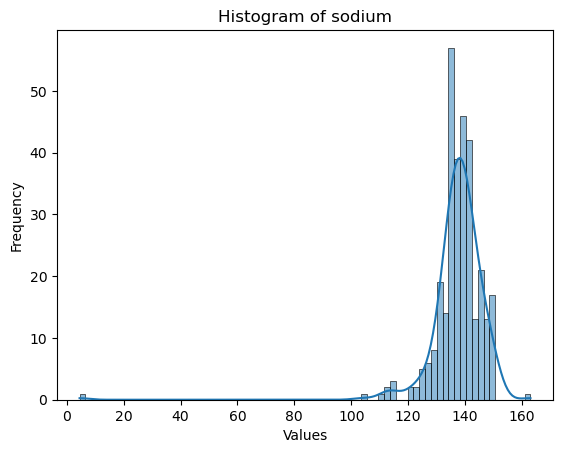

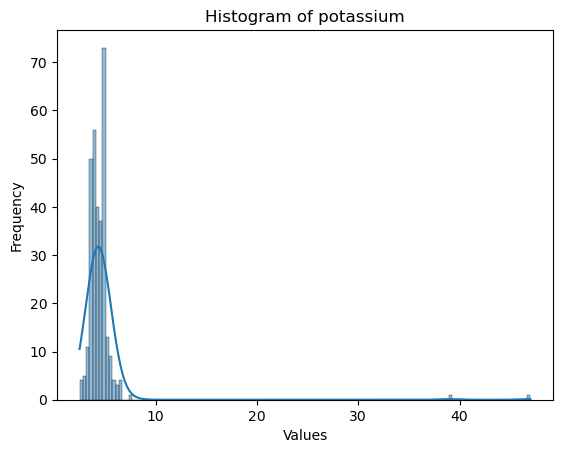

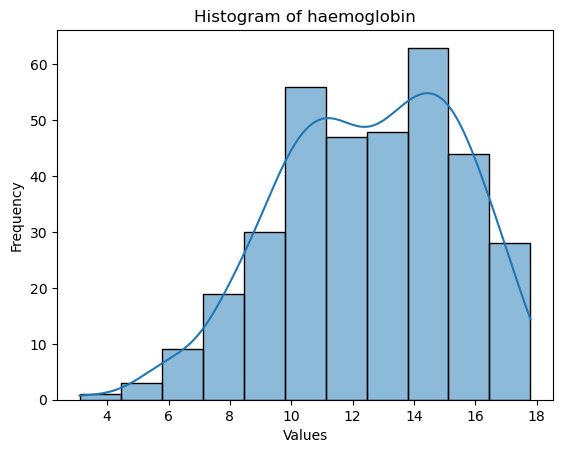

In [17]:
#lets get only numerical data and visualize them
numerical_data = df.select_dtypes(include=[np.number])
numerical_cols = numerical_data.columns.values
print(numerical_cols)
for column in numerical_cols:
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()


['red_blood_cells' 'pus_cell' 'pus_cell_clumps' 'bacteria'
 'packed_cell_volume' 'white_blood_cell_count' 'red_blood_cell_count'
 'hypertension' 'diabetes_mellitus' 'coronary_artery_disease' 'appetite'
 'peda_edema' 'aanemia' 'class']


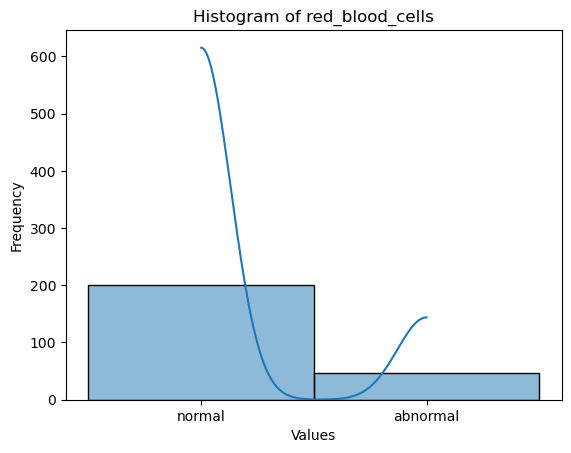

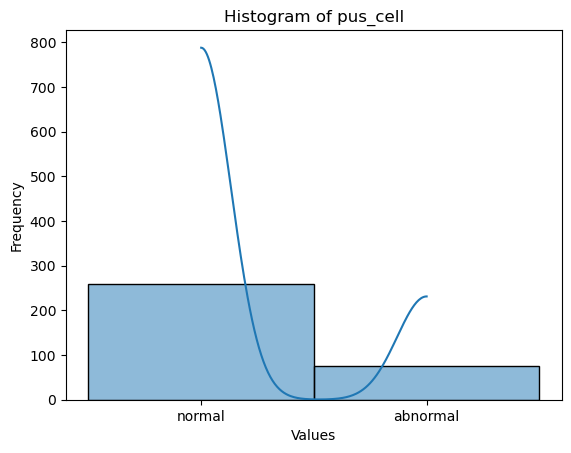

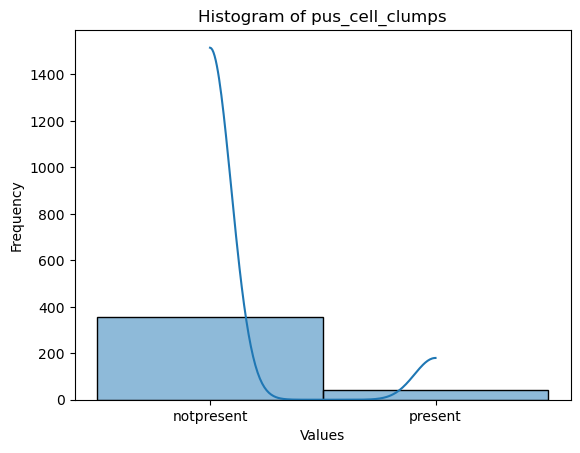

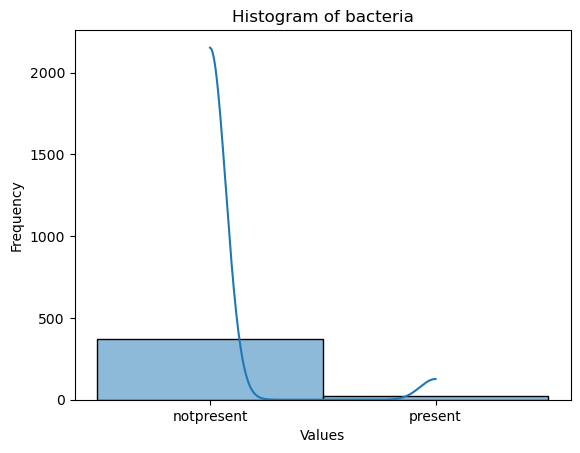

D:\kurulumlar\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


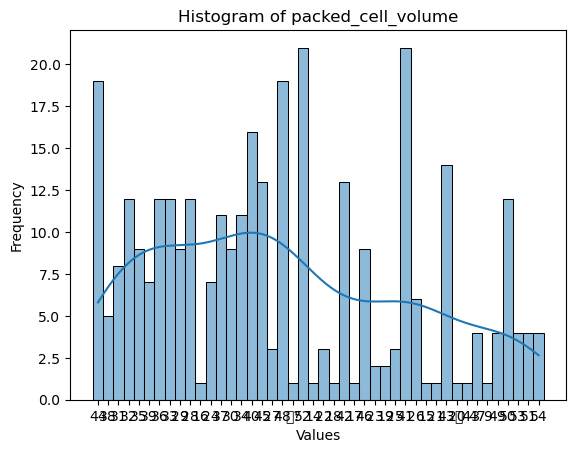

D:\kurulumlar\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


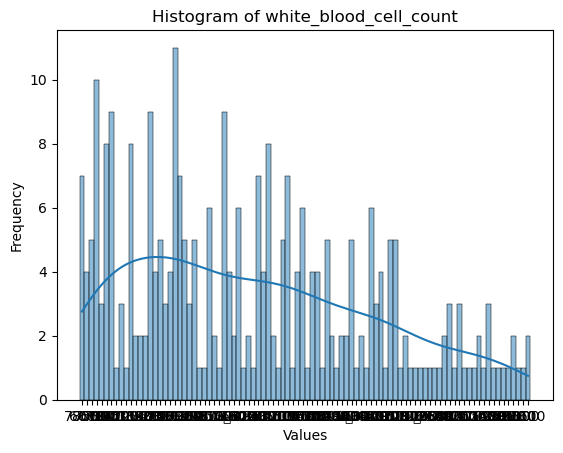

D:\kurulumlar\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


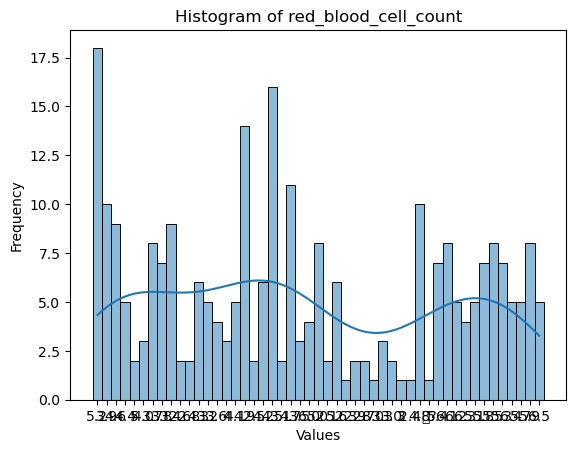

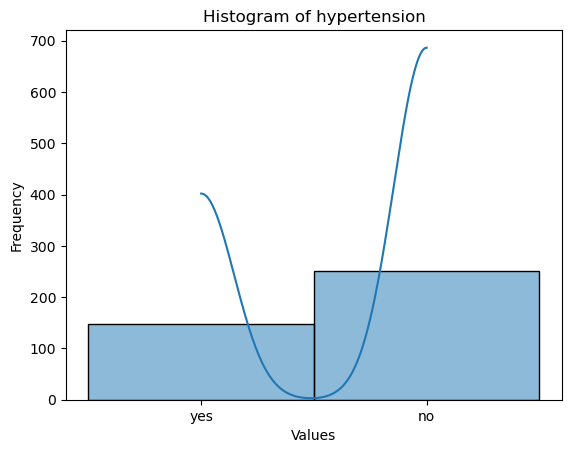

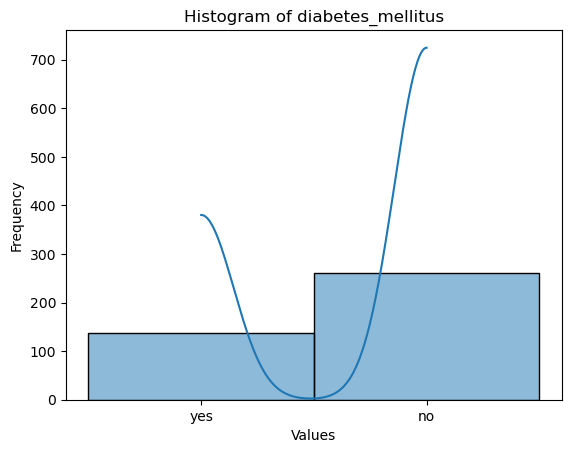

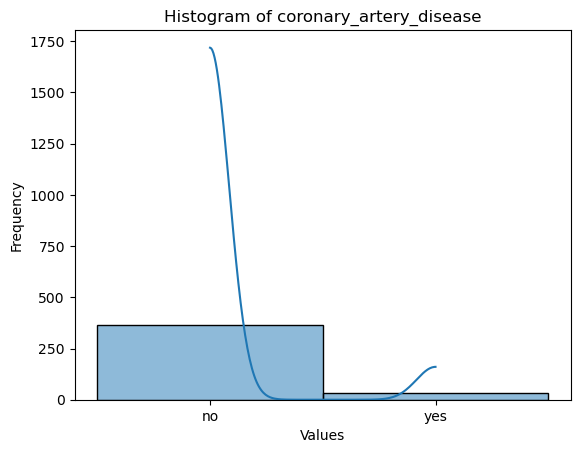

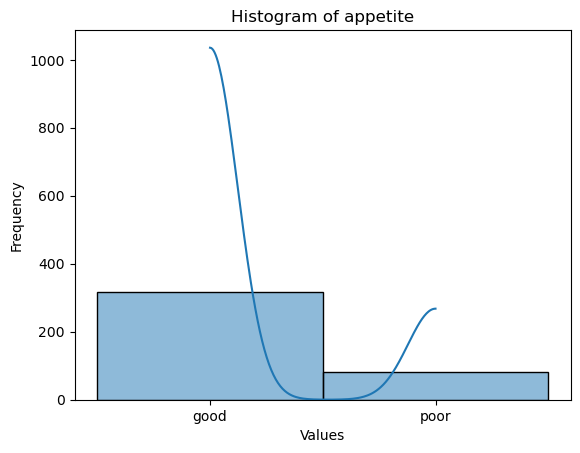

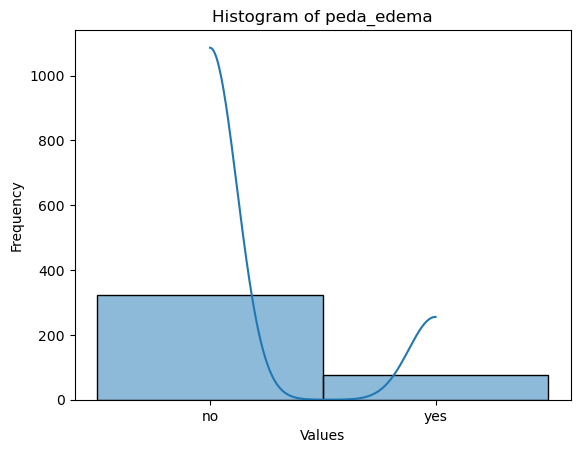

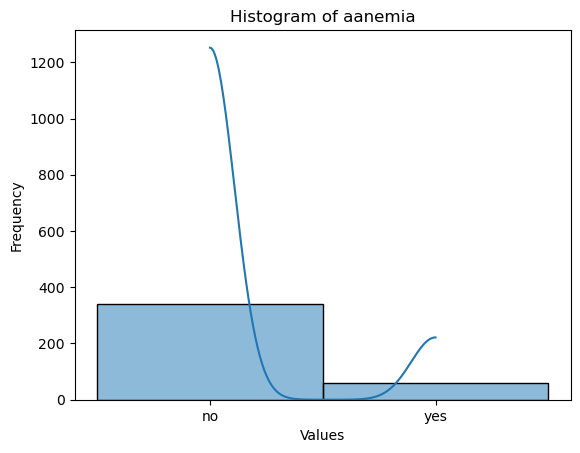

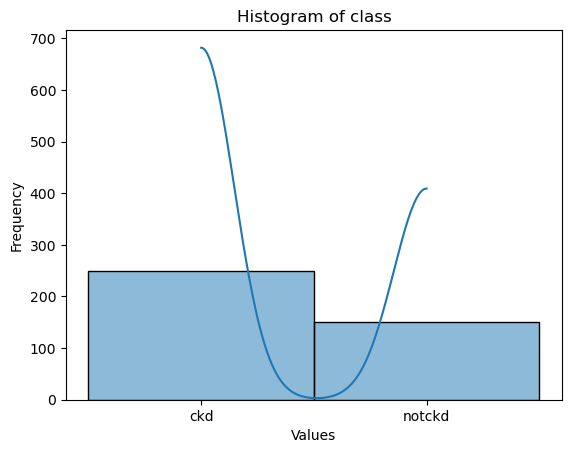

In [18]:
#lets get categorical columns and visualize them
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_cols = categorical_data.columns.values
print(categorical_cols)
for column in categorical_cols:
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

In [19]:
df['packed_cell_volume'] = df['packed_cell_volume'].replace('\t?', " ")

In [20]:
df['packed_cell_volume'] = df['packed_cell_volume'].replace('\t43', 15)

In [21]:
# check duplicates
df.duplicated().sum()

0

# DATA CLEANING

<Axes: >

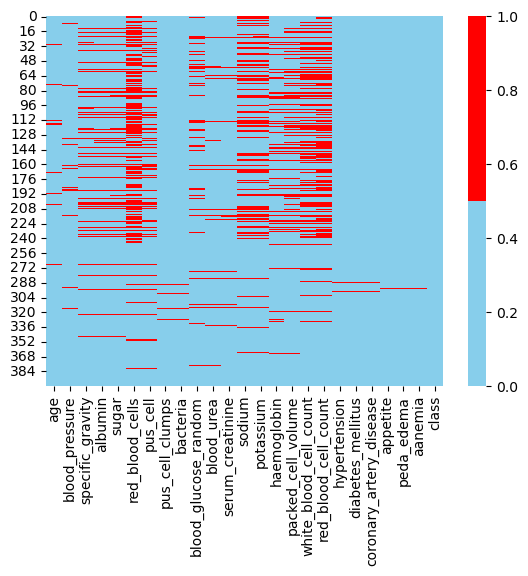

In [22]:

#look at missing values
cols =df.columns
colours = ['#87CEEB', '#FF0000'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [23]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [24]:
#copy data first to do experiment which method is best to fill missing values
data_2=df.copy()

age column,we do experiment on each column to fill missing values

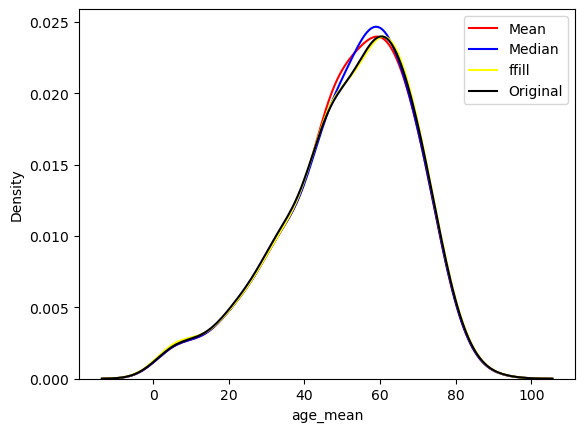

In [25]:
#we use 3 methods mean,median and ffill method and visualize them to see which is near to real data
age_mean = data_2.age.mean()
age_median = data_2.age.median()
data_2['age_mean'] = data_2.age.fillna(age_mean)
data_2['age_median'] = data_2.age.fillna(age_median)
data_2['new_age'] = data_2['age'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['age_mean'],color='red',label='Mean')
sns.kdeplot(data_2['age_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_age'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['age'],color='black',label='Original')
plt.legend()

We have used 3 techniques to compensate for the missing values and we noticed that the last technique called ffill has the best congruent distribution curve on the original distribution curve.

Therefore, it is best suited for this column and therefore we will use it in the original data

In [26]:
#add new column to dataframe
df['age']=data_2['new_age']

BP-blood pressure column

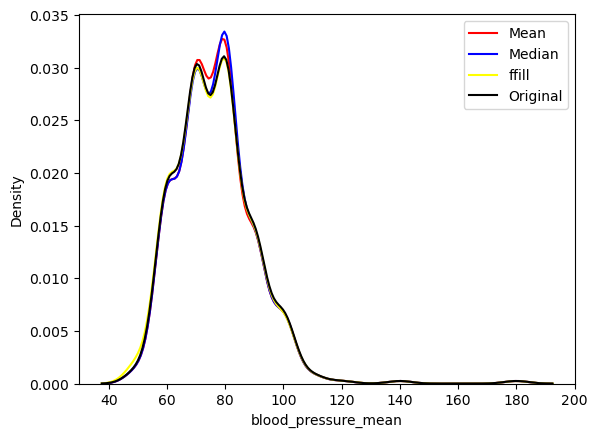

In [27]:
#do experiment for BP column
blood_pressure_mean = data_2.blood_pressure.mean()
blood_pressure_median = data_2.blood_pressure.median()
data_2['blood_pressure_mean'] = data_2.blood_pressure.fillna(blood_pressure_mean)
data_2['blood_pressure_median'] = data_2.blood_pressure.fillna(blood_pressure_median)
data_2['new_blood_pressure'] = data_2['blood_pressure'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['blood_pressure_mean'],color='red',label='Mean')
sns.kdeplot(data_2['blood_pressure_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_blood_pressure'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['blood_pressure'],color='black',label='Original')
plt.legend()

Once again, we note that the last technique is the most appropriate to use in order to compensate for the missing values.

In [28]:
df['blood_pressure']=data_2['new_blood_pressure']

specific gravity column

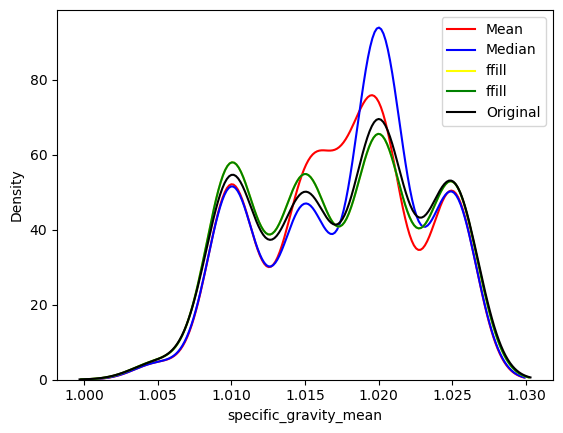

In [29]:
specific_gravity_mean = data_2.specific_gravity.mean()
specific_gravity_median = data_2.specific_gravity.median()
data_2['specific_gravity_mean'] = data_2.specific_gravity.fillna(specific_gravity_mean)
data_2['specific_gravity_median'] = data_2.specific_gravity.fillna(specific_gravity_median)
data_2['new_specific_gravity'] = data_2['specific_gravity'].fillna(method="ffill")
data_2['specific_gravity_new'] = data_2['specific_gravity'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['specific_gravity_mean'],color='red',label='Mean')
sns.kdeplot(data_2['specific_gravity_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_specific_gravity'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['specific_gravity_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['specific_gravity'],color='black',label='Original')
plt.legend()

Here we have used many techniques in order to compensate for the missing values, and we note that the third and fourth technique is the most suitable in the distribution for the original column distribution and therefore we will use any of them.

In [30]:
df['specific_gravity']=data_2['new_specific_gravity']

albumin column

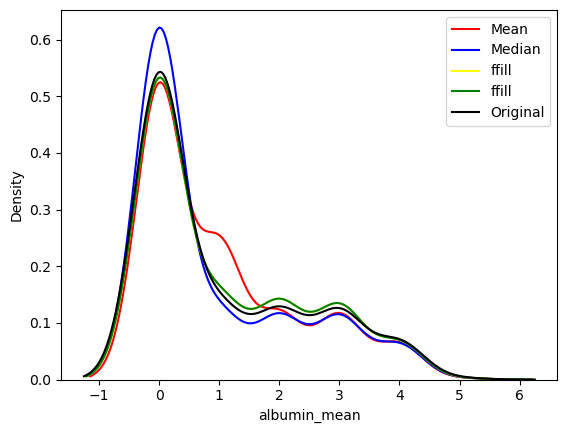

In [31]:
albumin_mean = data_2.albumin.mean()
albumin_median = data_2.albumin.median()
data_2['albumin_mean'] = data_2.albumin.fillna(albumin_mean)
data_2['albumin_median'] = data_2.albumin.fillna(albumin_median)
data_2['new_albumin'] = data_2['albumin'].fillna(method="ffill")
data_2['albumin_new'] = data_2['albumin'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['albumin_mean'],color='red',label='Mean')
sns.kdeplot(data_2['albumin_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_albumin'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['albumin_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['albumin'],color='black',label='Original')
plt.legend()

In [32]:
df['albumin']=data_2['new_albumin']

sugar column


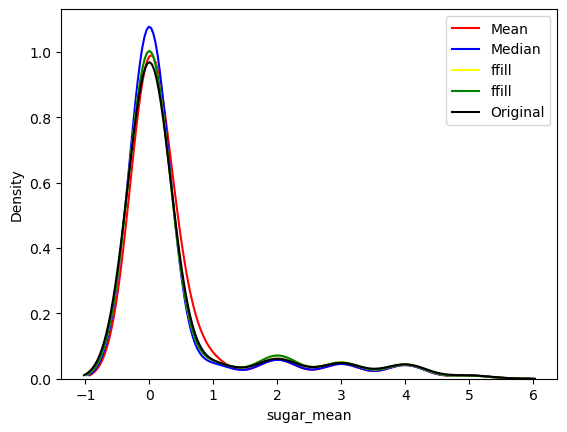

In [33]:
sugar_mean = data_2.sugar.mean()
sugar_median = data_2.sugar.median()
data_2['sugar_mean'] = data_2.sugar.fillna(sugar_mean)
data_2['sugar_median'] = data_2.sugar.fillna(sugar_median)
data_2['new_sugar'] = data_2['sugar'].fillna(method="ffill")
data_2['sugar_new'] = data_2['sugar'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['sugar_mean'],color='red',label='Mean')
sns.kdeplot(data_2['sugar_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_sugar'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['sugar_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['sugar'],color='black',label='Original')
plt.legend()

From the figure, we notice that there is a convergence in the distribution between the first, third and fourth techniques, but at the end of the figure we notice that the most appropriate are the third and fourth, so we will use any of them.

In [34]:
df['sugar']=data_2['new_sugar']

blood glucosa random

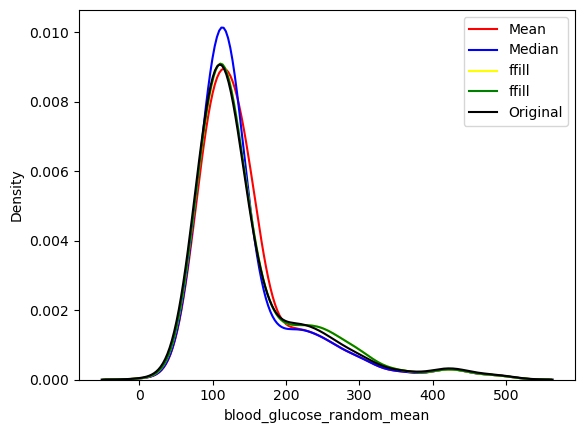

In [35]:
blood_glucose_random_mean = data_2.blood_glucose_random.mean()
blood_glucose_random_median = data_2.blood_glucose_random.median()
data_2['blood_glucose_random_mean'] = data_2.blood_glucose_random.fillna(blood_glucose_random_mean)
data_2['blood_glucose_random_median'] = data_2.blood_glucose_random.fillna(blood_glucose_random_median)
data_2['new_blood_glucose_random'] = data_2['blood_glucose_random'].fillna(method="ffill")
data_2['blood_glucose_random_new'] = data_2['blood_glucose_random'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['blood_glucose_random_mean'],color='red',label='Mean')
sns.kdeplot(data_2['blood_glucose_random_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_blood_glucose_random'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['blood_glucose_random_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['blood_glucose_random'],color='black',label='Original')
plt.legend()

In [36]:
df['blood_glucose_random']=data_2['blood_glucose_random_new']

blood urea

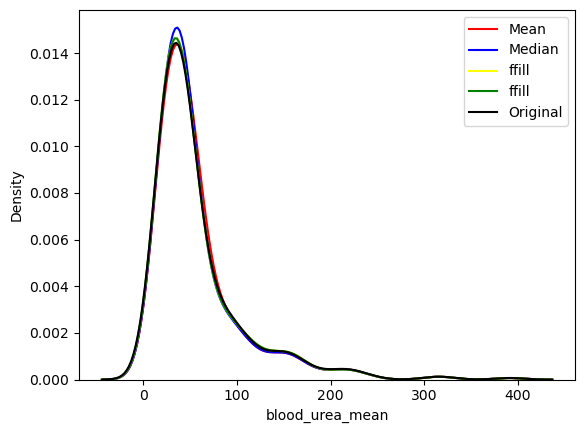

In [37]:
blood_urea_mean = data_2.blood_urea.mean()
blood_urea_median = data_2.blood_urea.median()
data_2['blood_urea_mean'] = data_2.blood_urea.fillna(blood_urea_mean)
data_2['blood_urea_median'] = data_2.blood_urea.fillna(blood_urea_median)
data_2['new_blood_urea'] = data_2['blood_urea'].fillna(method="ffill")
data_2['blood_urea_new'] = data_2['blood_urea'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['blood_urea_mean'],color='red',label='Mean')
sns.kdeplot(data_2['blood_urea_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_blood_urea'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['blood_urea_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['blood_urea'],color='black',label='Original')
plt.legend()

In [38]:
df['blood_urea']=data_2['blood_urea_mean']

serum_creatinine

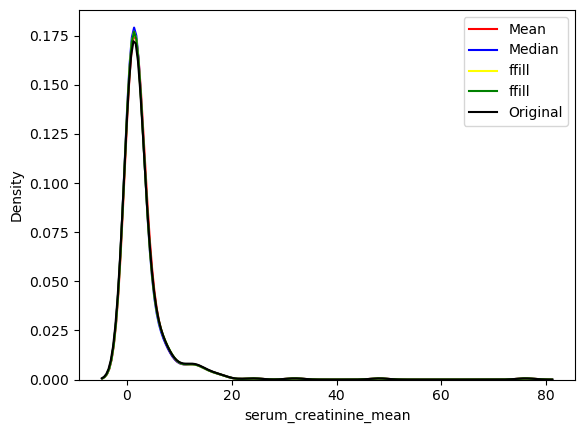

In [39]:
serum_creatinine_mean = data_2.serum_creatinine.mean()
serum_creatinine_median = data_2.serum_creatinine.median()
data_2['serum_creatinine_mean'] = data_2.serum_creatinine.fillna(serum_creatinine_mean)
data_2['serum_creatinine_median'] = data_2.serum_creatinine.fillna(serum_creatinine_median)
data_2['new_serum_creatinine'] = data_2['serum_creatinine'].fillna(method="ffill")
data_2['serum_creatinine_new'] = data_2['serum_creatinine'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['serum_creatinine_mean'],color='red',label='Mean')
sns.kdeplot(data_2['serum_creatinine_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_serum_creatinine'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['serum_creatinine_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['serum_creatinine'],color='black',label='Original')
plt.legend()

In [40]:
df['serum_creatinine']=data_2['serum_creatinine_mean']

sodium column

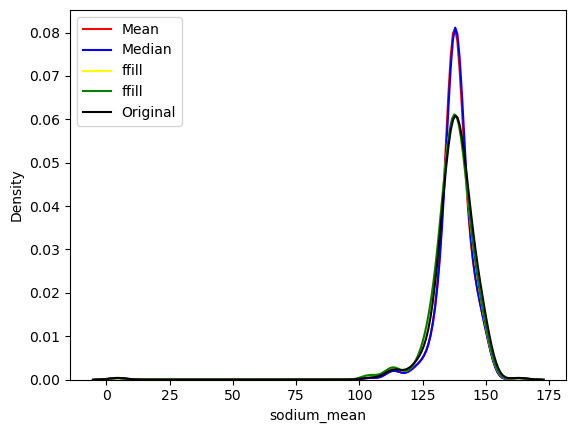

In [41]:
sodium_mean = data_2.sodium.mean()
sodium_median = data_2.sodium.median()
data_2['sodium_mean'] = data_2.sodium.fillna(sodium_mean)
data_2['sodium_median'] = data_2.sodium.fillna(sodium_median)
data_2['new_sodium'] = data_2['sodium'].fillna(method="ffill")
data_2['sodium_new'] = data_2['sodium'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['sodium_mean'],color='red',label='Mean')
sns.kdeplot(data_2['sodium_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_sodium'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['sodium_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['sodium'],color='black',label='Original')
plt.legend()

In [42]:
df['sodium']=data_2['sodium_new']

In [43]:
df['sodium'].head(10)

0      NaN
1      NaN
2      NaN
3    111.0
4    111.0
5    142.0
6    104.0
7    104.0
8    104.0
9    114.0
Name: sodium, dtype: float64

so it become impossible to fill forward since there is nan values respectivly use other method

In [44]:
data_2['sodium']=df['sodium']
sodium_mean = data_2.sodium.mean()
data_2['sodium_mean'] = data_2.sodium.fillna(sodium_mean)

In [45]:
df['sodium']=data_2['sodium_mean']
print(df['sodium'].isnull().sum())

0


potassium column

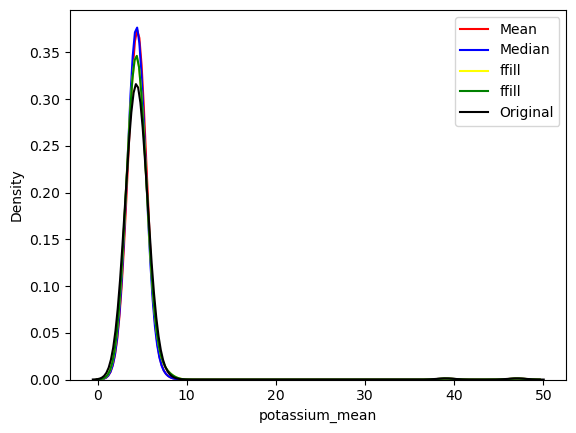

In [46]:
potassium_mean = data_2.potassium.mean()
potassium_median = data_2.potassium.median()
data_2['potassium_mean'] = data_2.potassium.fillna(potassium_mean)
data_2['potassium_median'] = data_2.potassium.fillna(potassium_median)
data_2['new_potassium'] = data_2['potassium'].fillna(method="ffill")
data_2['potassium_new'] = data_2['potassium'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['potassium_mean'],color='red',label='Mean')
sns.kdeplot(data_2['potassium_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_potassium'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['potassium_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['potassium'],color='black',label='Original')
plt.legend()

We note that the most appropriate distribution is the distribution for the second and third techniques, so I will use any of them.

In [47]:
df['potassium']=data_2['potassium_new']

In [48]:
df['potassium'].head()

0    NaN
1    NaN
2    NaN
3    2.5
4    2.5
Name: potassium, dtype: float64

so we face the same issue and we use different method which is best to fill missing value

In [49]:
df['potassium']=data_2['potassium_mean']
print(df['potassium'].isnull().sum())

0


haemoglobin column

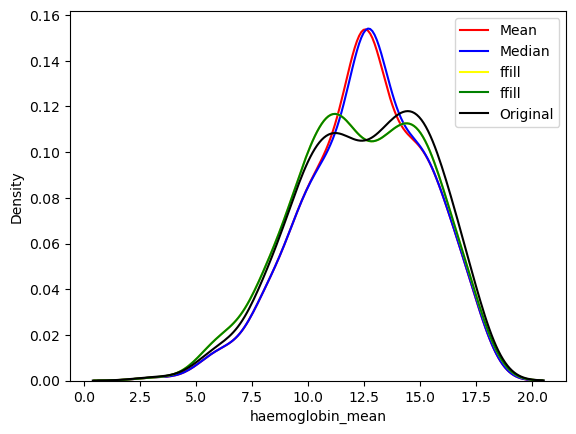

In [50]:
haemoglobin_mean = data_2.haemoglobin.mean()
haemoglobin_median = data_2.haemoglobin.median()
data_2['haemoglobin_mean'] = data_2.haemoglobin.fillna(haemoglobin_mean)
data_2['haemoglobin_median'] = data_2.haemoglobin.fillna(haemoglobin_median)
data_2['new_haemoglobin'] = data_2['haemoglobin'].fillna(method="ffill")
data_2['haemoglobin_new'] = data_2['haemoglobin'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['haemoglobin_mean'],color='red',label='Mean')
sns.kdeplot(data_2['haemoglobin_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_haemoglobin'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['haemoglobin_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['haemoglobin'],color='black',label='Original')
plt.legend()

In [51]:
df['haemoglobin']=data_2['haemoglobin_new']

Now I will start dealing with categorical data.
To make it easier, I will separate the categorical columns from the numerical columns

In [52]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_cols = categorical_data.columns.values
print(categorical_cols)

['red_blood_cells' 'pus_cell' 'pus_cell_clumps' 'bacteria'
 'packed_cell_volume' 'white_blood_cell_count' 'red_blood_cell_count'
 'hypertension' 'diabetes_mellitus' 'coronary_artery_disease' 'appetite'
 'peda_edema' 'aanemia' 'class']


We must deal with categorical data with a lot of sensitivity, and in the real problem, we will review the party responsible for collecting that data in order to review the missing values, so that we can obtain a way that we have done the compensation process more efficiently.

red_blood_cells column

In [53]:
df['red_blood_cells'].isnull().sum()

152

In [54]:
df['red_blood_cells'].value_counts()

normal      201
abnormal     47
Name: red_blood_cells, dtype: int64

In [55]:
df['red_blood_cells'].head()

0       NaN
1       NaN
2    normal
3    normal
4    normal
Name: red_blood_cells, dtype: object

<Axes: >

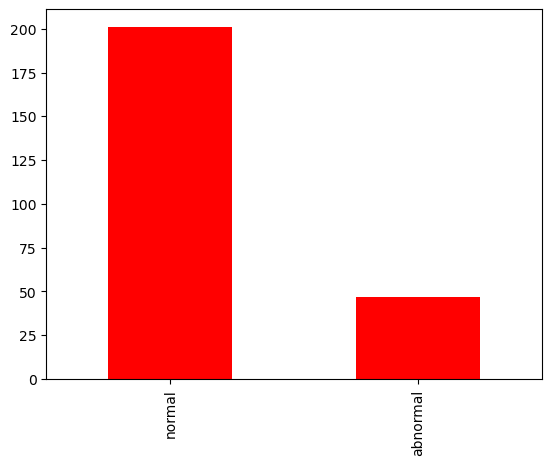

In [56]:
df['red_blood_cells'].value_counts().plot.bar(color='red')

In [57]:
df['red_blood_cells'].fillna(method='ffill', inplace=True)

In [58]:
df['red_blood_cells'].isnull().sum()

2

In [59]:
df['red_blood_cells'].fillna('normal', inplace=True)

In [60]:
df['red_blood_cells'].value_counts()

normal      291
abnormal    109
Name: red_blood_cells, dtype: int64

In [61]:
df['red_blood_cells'].isnull().sum()

0

In [62]:
df['red_blood_cells'].dtype

dtype('O')

pus_cell



In [63]:
df['pus_cell'].isnull().sum()

65

In [64]:
df['pus_cell'].value_counts()

normal      259
abnormal     76
Name: pus_cell, dtype: int64

In [65]:
df['pus_cell'].fillna(method='ffill', inplace=True)

<Axes: >

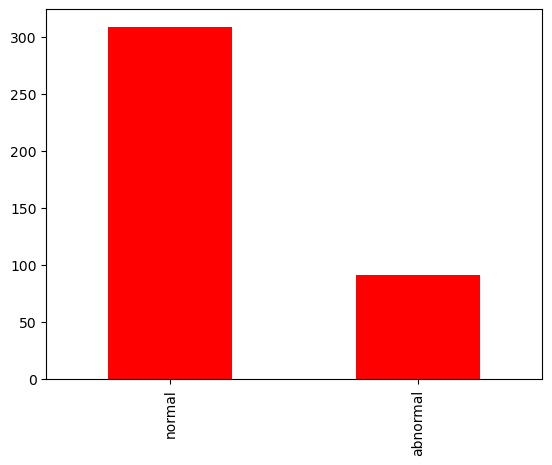

In [66]:
df['pus_cell'].value_counts().plot.bar(color='red')

In [67]:
df['pus_cell'].value_counts()

normal      309
abnormal     91
Name: pus_cell, dtype: int64

pus_cell_clumps column

In [68]:
df['pus_cell_clumps'].isnull().sum()

4

In [69]:
df['pus_cell_clumps'].value_counts()

notpresent    354
present        42
Name: pus_cell_clumps, dtype: int64

In [70]:
df['pus_cell_clumps'].fillna(method='ffill', inplace=True)

<Axes: >

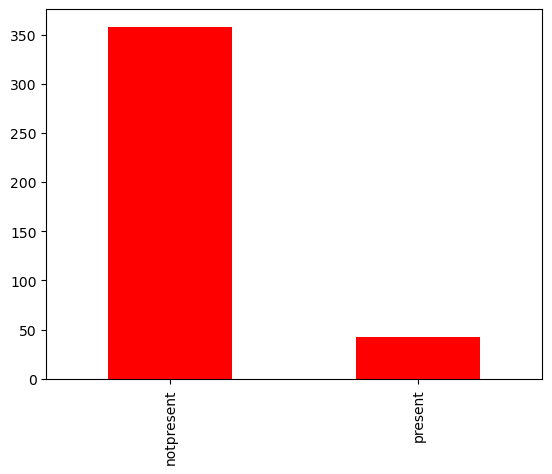

In [71]:
df['pus_cell_clumps'].value_counts().plot.bar(color='red')

bacteria column

In [72]:
df['bacteria'].value_counts()

notpresent    374
present        22
Name: bacteria, dtype: int64

In [73]:
df['bacteria'].fillna(method='ffill', inplace=True)

<Axes: >

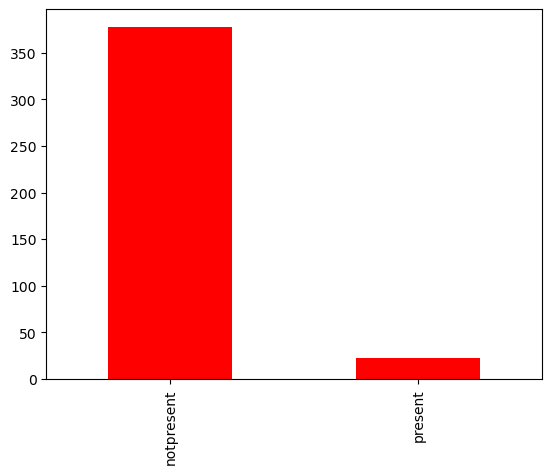

In [74]:
df['bacteria'].value_counts().plot.bar(color='red')

hypertension

In [75]:
df['hypertension'].isnull().sum()

2

In [76]:
df['hypertension'].value_counts()

no     251
yes    147
Name: hypertension, dtype: int64

<Axes: >

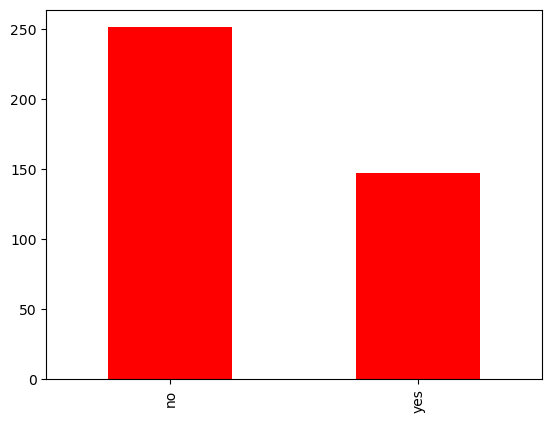

In [77]:
df['hypertension'].value_counts().plot.bar(color='red')

In [78]:
df['hypertension'].fillna(method='ffill', inplace=True)

In [79]:
df['hypertension'].isnull().sum()

0

diabetes_mellitus

In [80]:
df['diabetes_mellitus'].isnull().sum()

2

In [81]:
df['diabetes_mellitus'].value_counts()

no     261
yes    137
Name: diabetes_mellitus, dtype: int64

<Axes: >

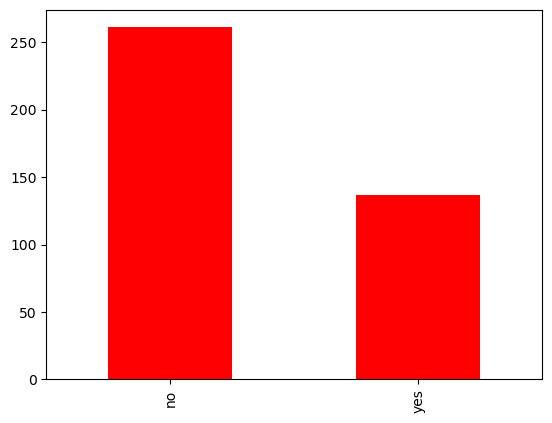

In [82]:
df['diabetes_mellitus'].value_counts().plot.bar(color='red')

In [83]:
df['diabetes_mellitus'].fillna(method='ffill', inplace=True)

In [84]:
df['diabetes_mellitus'].isnull().sum()

0

coronary_artery_disease

In [85]:
df['coronary_artery_disease'].isnull().sum()

2

In [86]:
df['coronary_artery_disease'].value_counts()

no     364
yes     34
Name: coronary_artery_disease, dtype: int64

<Axes: >

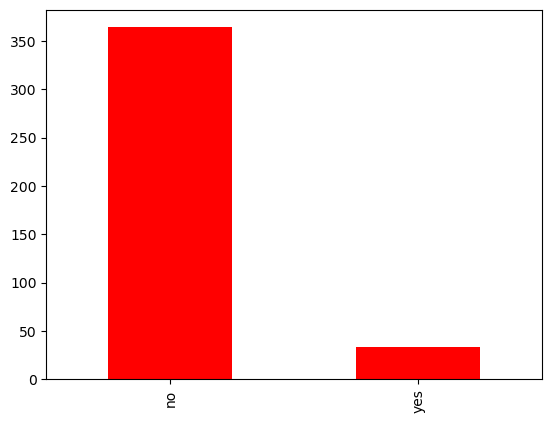

In [87]:
df['coronary_artery_disease'].value_counts().plot.bar(color='red')

In [88]:
df['coronary_artery_disease'].fillna(method='ffill', inplace=True)

In [89]:
df['coronary_artery_disease'].isnull().sum()

0

appetite column

In [90]:
df['appetite'].value_counts()

good    317
poor     82
Name: appetite, dtype: int64

In [91]:
df['appetite'].fillna(method='ffill', inplace=True)

In [92]:
df['appetite'].isnull().sum()

0

peda_edema

In [93]:
df['peda_edema'].isnull().sum()

1

In [94]:
df['peda_edema'].fillna(method='ffill',inplace=True)

In [95]:
df['peda_edema'].isnull().sum()

0

anemia column

In [96]:
df['aanemia'].value_counts()

no     339
yes     60
Name: aanemia, dtype: int64

In [97]:
df['aanemia'].isnull().sum()

1

In [98]:
df['aanemia'].fillna(method='ffill',inplace=True)

In [99]:
df['aanemia'].isnull().sum()

0

packed_cell_volume

In [100]:
df['packed_cell_volume'].isnull().sum()

70

In [101]:
df['packed_cell_volume'].value_counts()

41    21
52    21
44    19
48    19
40    16
43    14
42    13
45    13
32    12
36    12
33    12
50    12
28    12
34    11
37    11
30     9
29     9
35     9
46     9
31     8
24     7
39     7
26     6
38     5
53     4
51     4
49     4
47     4
54     4
25     3
27     3
22     3
19     2
23     2
15     1
21     1
17     1
20     1
15     1
18     1
9      1
14     1
       1
16     1
Name: packed_cell_volume, dtype: int64

In [102]:
df['packed_cell_volume'] = df['packed_cell_volume'].replace('\t?', " ")

In [103]:
df['packed_cell_volume'] = df['packed_cell_volume'].replace('\t43', 15)

In [104]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce').astype('Int64')

In [105]:
df['packed_cell_volume'] = df['packed_cell_volume'].astype(float)

In [106]:
df['packed_cell_volume'].value_counts()

41.0    21
52.0    21
44.0    19
48.0    19
40.0    16
43.0    14
42.0    13
45.0    13
32.0    12
50.0    12
36.0    12
33.0    12
28.0    12
34.0    11
37.0    11
30.0     9
29.0     9
35.0     9
46.0     9
31.0     8
24.0     7
39.0     7
26.0     6
38.0     5
53.0     4
51.0     4
49.0     4
47.0     4
54.0     4
25.0     3
27.0     3
22.0     3
19.0     2
15.0     2
23.0     2
21.0     1
20.0     1
17.0     1
9.0      1
18.0     1
14.0     1
16.0     1
Name: packed_cell_volume, dtype: int64

In [107]:
df['packed_cell_volume'].dtype

dtype('float64')

In [108]:
df['packed_cell_volume'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [109]:
data_1=df.copy()

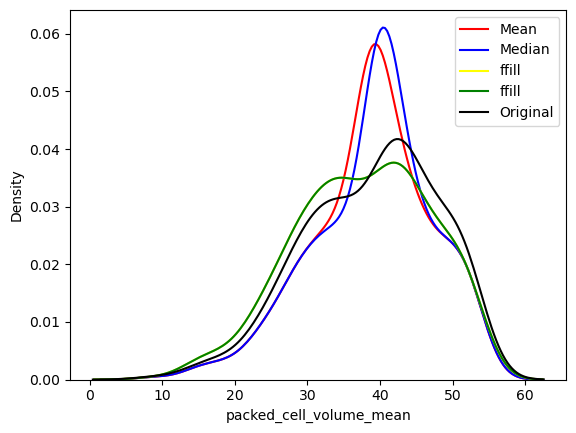

In [110]:
packed_cell_volume_mean = data_1.packed_cell_volume.mean()
packed_cell_volume_median = data_1.packed_cell_volume.median()
data_1['packed_cell_volume_mean'] = data_1.packed_cell_volume.fillna(packed_cell_volume_mean)
data_1['packed_cell_volume_median'] = data_1.packed_cell_volume.fillna(packed_cell_volume_median)
data_1['new_packed_cell_volume'] = data_1['packed_cell_volume'].fillna(method="ffill")
data_1['packed_cell_volume_new'] = data_1['packed_cell_volume'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_1['packed_cell_volume_mean'],color='red',label='Mean')
sns.kdeplot(data_1['packed_cell_volume_median'],color='blue',label='Median')
sns.kdeplot(data_1['new_packed_cell_volume'] ,color='yellow',label='ffill')
sns.kdeplot(data_1['packed_cell_volume_new'] ,color='green',label='ffill')
sns.kdeplot(data_1['packed_cell_volume'],color='black',label='Original')
plt.legend()

In [111]:
df['packed_cell_volume']=data_1['packed_cell_volume_new']

wc white_blood_cell_count

In [112]:
df['white_blood_cell_count'].head()

0    7800
1    6000
2    7500
3    6700
4    7300
Name: white_blood_cell_count, dtype: object

In [113]:
#change dtype
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce').astype('Int64')

In [114]:
df['white_blood_cell_count'] = df['white_blood_cell_count'].astype(float)

In [115]:
df['white_blood_cell_count'].value_counts

<bound method IndexOpsMixin.value_counts of 0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: white_blood_cell_count, Length: 400, dtype: float64>

In [116]:

column_dtype = df['white_blood_cell_count'].dtype

print(column_dtype)

float64


#change specific value that we get error from float to int
string_number = "8406.122448979591"
float_number = float(string_number)  # Convert the string to a float
rounded_number = round(float_number) # Round the float to the nearest integer
integer_number = int(rounded_number) # Convert the rounded float to an int
print(integer_number)

In [117]:
data_3=df.copy()

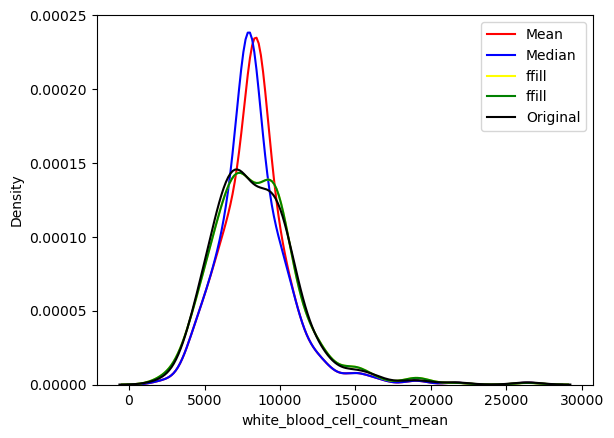

In [118]:
white_blood_cell_count_mean = data_3.white_blood_cell_count.mean()
white_blood_cell_count_median = data_3.white_blood_cell_count.median()
data_3['white_blood_cell_count_mean'] = data_3.white_blood_cell_count.fillna(white_blood_cell_count_mean)
data_3['white_blood_cell_count_median'] = data_3.white_blood_cell_count.fillna(white_blood_cell_count_median)
data_3['new_white_blood_cell_count'] = data_3['white_blood_cell_count'].fillna(method="ffill")
data_3['white_blood_cell_count_new'] = data_3['white_blood_cell_count'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_3['white_blood_cell_count_mean'],color='red',label='Mean')
sns.kdeplot(data_3['white_blood_cell_count_median'],color='blue',label='Median')
sns.kdeplot(data_3['new_white_blood_cell_count'] ,color='yellow',label='ffill')
sns.kdeplot(data_3['white_blood_cell_count_new'] ,color='green',label='ffill')
sns.kdeplot(data_3['white_blood_cell_count'],color='black',label='Original')
plt.legend()

In [119]:
df['white_blood_cell_count']=data_3['white_blood_cell_count_new']

In [120]:
df['white_blood_cell_count'].isnull().sum()

0

rbc column--red_blood_cell_count

In [121]:
df['red_blood_cell_count'].dtype

dtype('O')

In [122]:
df['red_blood_cell_count'].value_counts()

5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
4.6     9
3.4     9
5.9     8
5.5     8
6.1     8
5.0     8
3.7     8
5.3     7
5.8     7
5.4     7
3.8     7
5.6     6
4.3     6
4.2     6
3.2     5
4.4     5
5.7     5
6.4     5
5.1     5
6.2     5
6.5     5
4.1     5
3.6     4
6.3     4
6.0     4
4.0     3
3.3     3
4       3
3.5     3
2.9     2
3.1     2
2.6     2
2.1     2
2.5     2
2.8     2
3.0     2
2.7     2
5       2
2.3     1
\t?     1
2.4     1
3       1
8.0     1
Name: red_blood_cell_count, dtype: int64

In [123]:
df['red_blood_cell_count'] = df['red_blood_cell_count'].replace('\t?', "3")

In [124]:
#change dtype
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce').astype('float')

In [125]:
df['red_blood_cell_count'].isnull().sum()

130

In [126]:
data_5=df.copy()

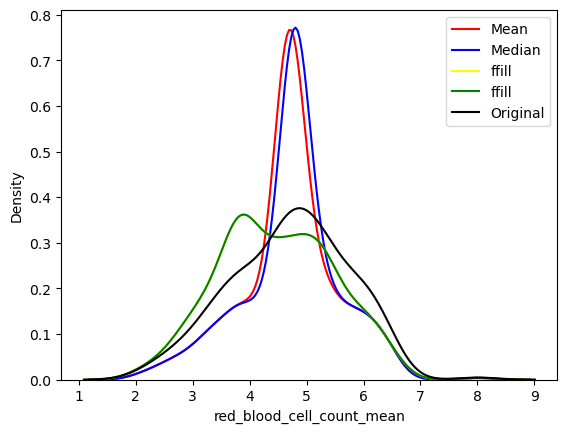

In [127]:
red_blood_cell_count_mean = data_5.red_blood_cell_count.mean()
red_blood_cell_count_median = data_5.red_blood_cell_count.median()
data_5['red_blood_cell_count_mean'] = data_5.red_blood_cell_count.fillna(red_blood_cell_count_mean)
data_5['red_blood_cell_count_median'] = data_5.red_blood_cell_count.fillna(red_blood_cell_count_median)
data_5['new_red_blood_cell_count'] = data_5['red_blood_cell_count'].fillna(method="ffill")
data_5['red_blood_cell_count_new'] = data_5['red_blood_cell_count'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_5['red_blood_cell_count_mean'],color='red',label='Mean')
sns.kdeplot(data_5['red_blood_cell_count_median'],color='blue',label='Median')
sns.kdeplot(data_5['new_red_blood_cell_count'] ,color='yellow',label='ffill')
sns.kdeplot(data_5['red_blood_cell_count_new'] ,color='green',label='ffill')
sns.kdeplot(data_5['red_blood_cell_count'],color='black',label='Original')
plt.legend()

In [128]:
df['red_blood_cell_count'].dtype

dtype('float64')

In [129]:
data_4=df.copy()

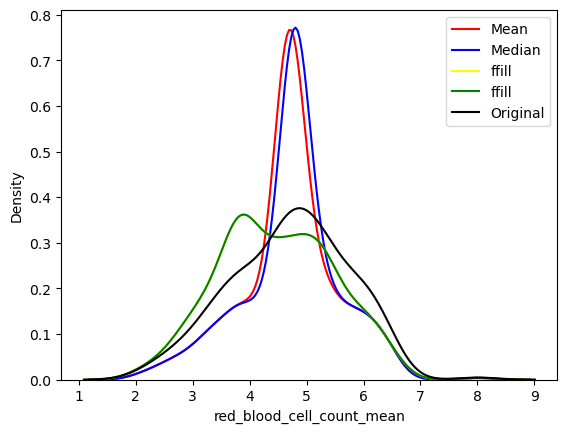

In [130]:
red_blood_cell_count_mean = data_4.red_blood_cell_count.mean()
red_blood_cell_count_median = data_4.red_blood_cell_count.median()
data_4['red_blood_cell_count_mean'] = data_4.red_blood_cell_count.fillna(red_blood_cell_count_mean)
data_4['red_blood_cell_count_median'] = data_4.red_blood_cell_count.fillna(red_blood_cell_count_median)
data_4['new_red_blood_cell_count'] = data_4['red_blood_cell_count'].fillna(method="ffill")
data_4['red_blood_cell_count_new'] = data_4['red_blood_cell_count'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_4['red_blood_cell_count_mean'],color='red',label='Mean')
sns.kdeplot(data_4['red_blood_cell_count_median'],color='blue',label='Median')
sns.kdeplot(data_4['new_red_blood_cell_count'] ,color='yellow',label='ffill')
sns.kdeplot(data_4['red_blood_cell_count_new'] ,color='green',label='ffill')
sns.kdeplot(data_4['red_blood_cell_count'],color='black',label='Original')
plt.legend()

In [131]:
df['red_blood_cell_count']=data_5['red_blood_cell_count_new']

lets check target column(y)

In [132]:
df['class'].fillna(method='ffill', inplace=True)

In [133]:
df['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

In [134]:
#lets check data balance

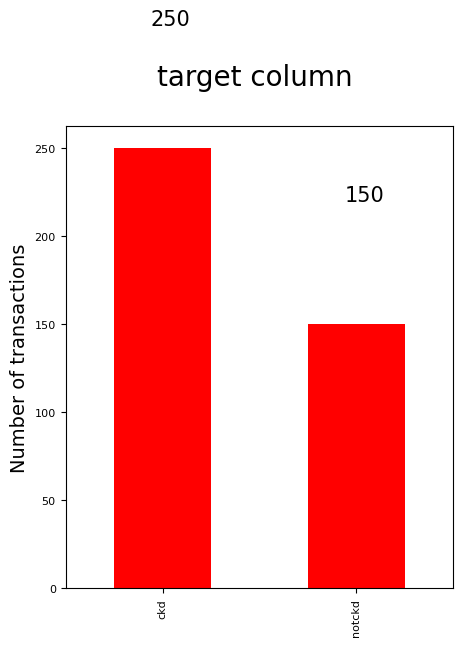

In [135]:
ax = df["class"].value_counts().plot(kind='bar', figsize=(5, 6), fontsize=8, color='red')
ax.set_title('target column ', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 70, str(round(i.get_height(), 2)), fontsize=15)


It appears that the data has a relatively good balance between the categories of the target column, and therefore we will not manipulate this natural balance.

**handling outliers so extract numeric columns from categorical columns**


In [137]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['age' 'blood_pressure' 'specific_gravity' 'albumin' 'sugar'
 'blood_glucose_random' 'blood_urea' 'serum_creatinine' 'sodium'
 'potassium' 'haemoglobin' 'packed_cell_volume' 'white_blood_cell_count'
 'red_blood_cell_count']


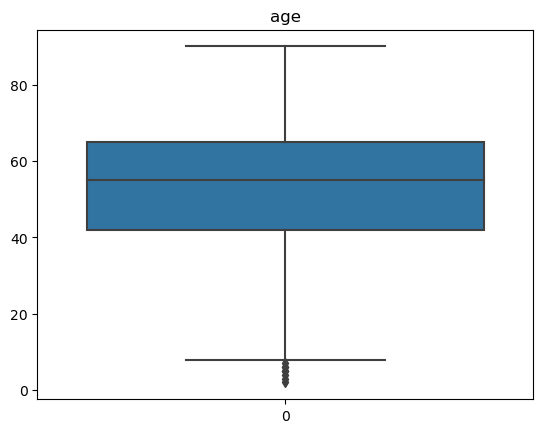

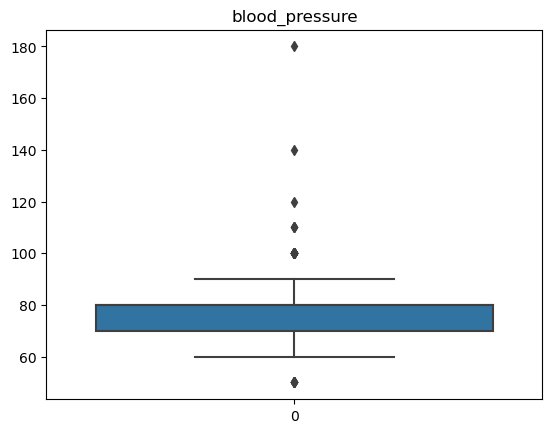

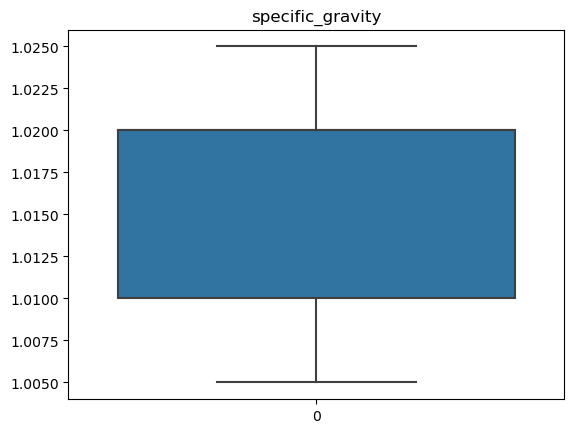

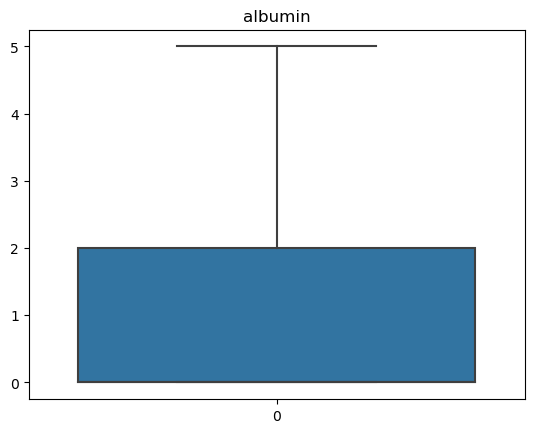

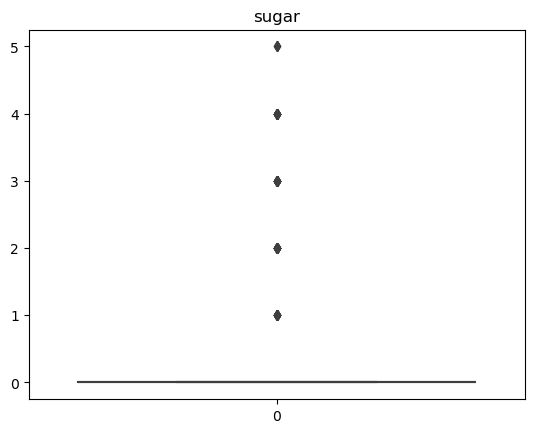

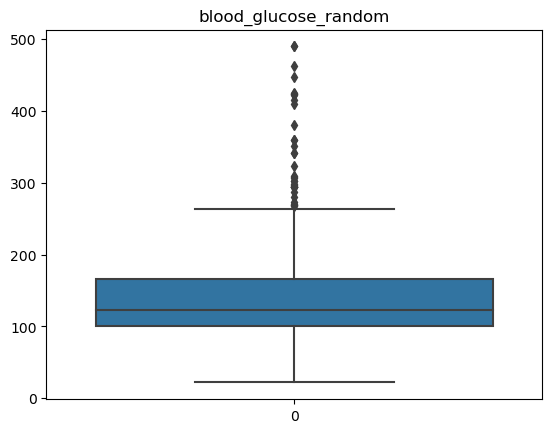

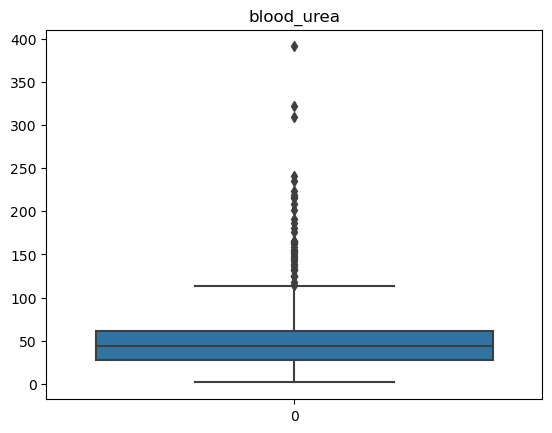

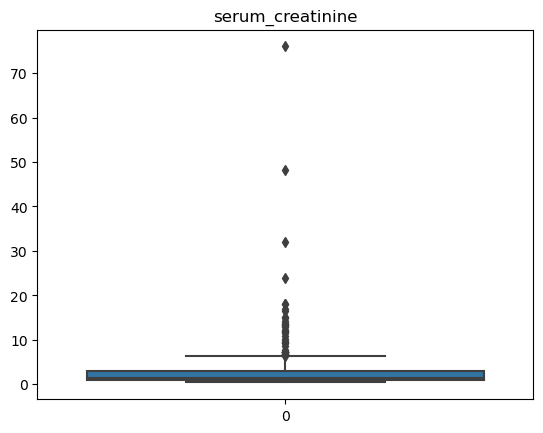

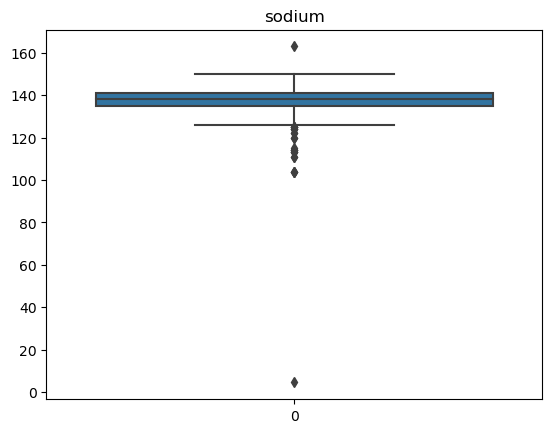

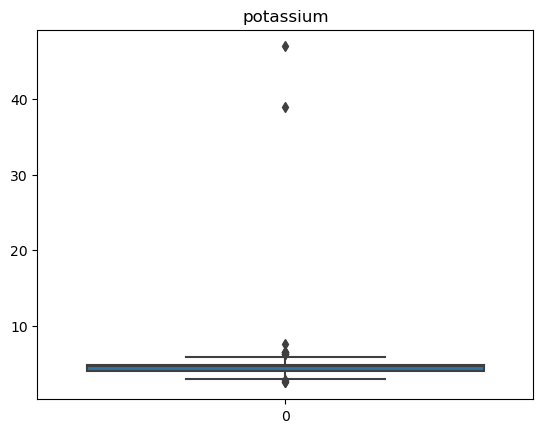

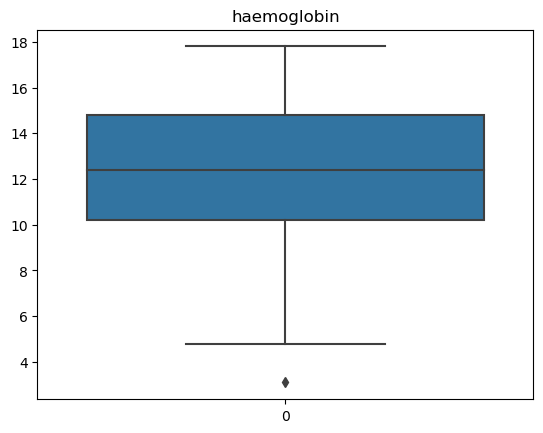

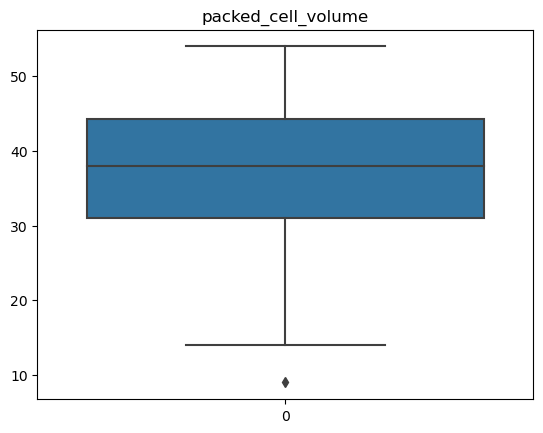

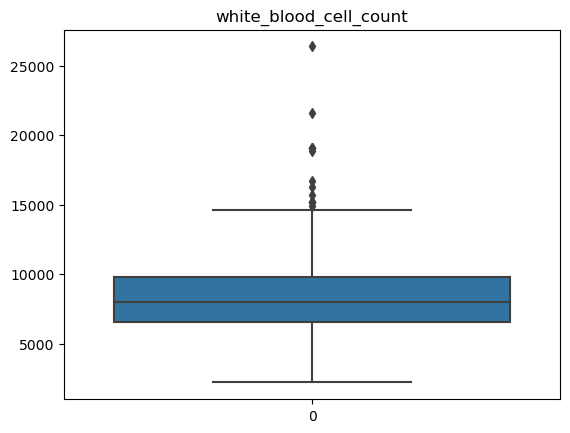

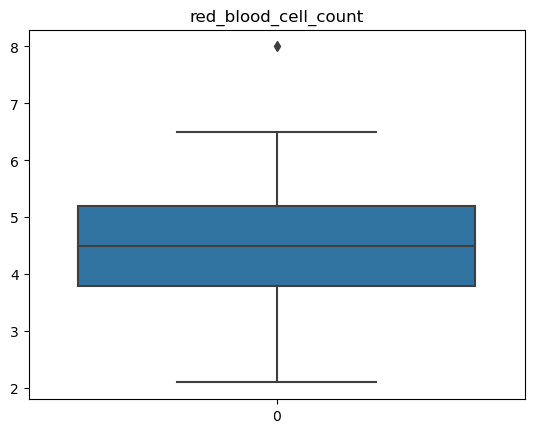

In [138]:
# dealing with outliers values
for i in df_numeric.columns:
    sns.boxplot(df_numeric[i])
    plt.title(i)
    plt.show()

But we know very well that the decision to get rid of outliers is a decision that must be a well-thought-out decision, and in most cases we consult specialists in the case of these data, we have to consult a specialist in the medical field, specifically Chronic KIdney Disease.

But that process is not currently available to us because we are working on ready data, so we will leave that step as it is and move on to the next step.

#datasplitting
target=df["class"]
features=df.drop(["class"],axis=1)

In [139]:
#choose categorical columns
object_columns = df.select_dtypes(include='object').columns.tolist()


In [140]:
object_columns=['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [141]:
#do encoding
label_1=LabelEncoder()

In [142]:
for col in object_columns:
    if col in df.columns:
        df[col] = label_1.fit_transform(df[col])

In [143]:
print(df)

      age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0    48.0            80.0             1.020      1.0    0.0                1   
1     7.0            50.0             1.020      4.0    0.0                1   
2    62.0            80.0             1.010      2.0    3.0                1   
3    48.0            70.0             1.005      4.0    0.0                1   
4    51.0            80.0             1.010      2.0    0.0                1   
..    ...             ...               ...      ...    ...              ...   
395  55.0            80.0             1.020      0.0    0.0                1   
396  42.0            70.0             1.025      0.0    0.0                1   
397  12.0            80.0             1.020      0.0    0.0                1   
398  17.0            60.0             1.025      0.0    0.0                1   
399  58.0            80.0             1.025      0.0    0.0                1   

     pus_cell  pus_cell_clumps  bacteri

In [144]:
#get numeric columns
numeric_columns = df.select_dtypes(exclude='object').columns.tolist()
numeric_columns

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [145]:
#do scaling
scaler = MinMaxScaler()


In [146]:
for col in numeric_columns:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])  # Scaling each column separately

# Display the updated DataFrame
print(df)

          age  blood_pressure  specific_gravity  albumin  sugar  \
0    0.522727        0.230769              0.75      0.2    0.0   
1    0.056818        0.000000              0.75      0.8    0.0   
2    0.681818        0.230769              0.25      0.4    0.6   
3    0.522727        0.153846              0.00      0.8    0.0   
4    0.556818        0.230769              0.25      0.4    0.0   
..        ...             ...               ...      ...    ...   
395  0.602273        0.230769              0.75      0.0    0.0   
396  0.454545        0.153846              1.00      0.0    0.0   
397  0.113636        0.230769              0.75      0.0    0.0   
398  0.170455        0.076923              1.00      0.0    0.0   
399  0.636364        0.230769              1.00      0.0    0.0   

     red_blood_cells  pus_cell  pus_cell_clumps  bacteria  \
0                1.0       1.0              0.0       0.0   
1                1.0       1.0              0.0       0.0   
2           

# FEATURE SELECTION

**Feature selection
The two most commonly used feature selection methods for categorical input data when the target variable is also categorical (e.g. classification predictive modeling) are the chi-squared statistic and the mutual information statistic**

In [147]:

# Separating X (features) and y (target)
X = df.drop(columns=['class'])  # Drop the target column to get feature columns
y=df['class']

print(y.shape)
print(y.head())

(400,)
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64


In [148]:
# Separating X (features) and y (target)
X = df.drop(columns=['class'])  # Drop the target column to get feature columns
y=df['class']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    1.0
399    1.0
Name: class, Length: 400, dtype: float64

In [149]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [150]:
#we choose mutual information method for feature selection in classification models so write method
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=10)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs,fs

In [151]:

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 0.054171
Feature 1: 0.140516
Feature 2: 0.390893
Feature 3: 0.311024
Feature 4: 0.149023
Feature 5: 0.134821
Feature 6: 0.121502
Feature 7: 0.022445
Feature 8: 0.050016
Feature 9: 0.177655
Feature 10: 0.188865
Feature 11: 0.371216
Feature 12: 0.236189
Feature 13: 0.215037
Feature 14: 0.491455
Feature 15: 0.447150
Feature 16: 0.095574
Feature 17: 0.413162
Feature 18: 0.248467
Feature 19: 0.273914
Feature 20: 0.047714
Feature 21: 0.084915
Feature 22: 0.061982
Feature 23: 0.069230


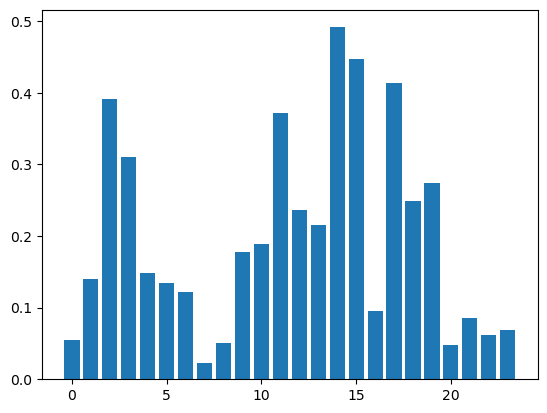

In [152]:
#check scores of features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# LOGISTIC REGRESSION

In [153]:
#lets do modelling 
#logistic regression
classimodel= LogisticRegression()  
classimodel.fit(X_train_fs,y_train)
trainscore =  classimodel.score(X_train_fs,y_train)
testscore =  classimodel.score(X_test_fs,y_test)  

In [154]:
y_pred =  classimodel.predict(X_test_fs)

In [155]:
print(' f1 score: ',f1_score(y_test, y_pred))

 f1 score:  1.0


In [156]:
#check confusion matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[28,  0],
       [ 0, 12]], dtype=int64)

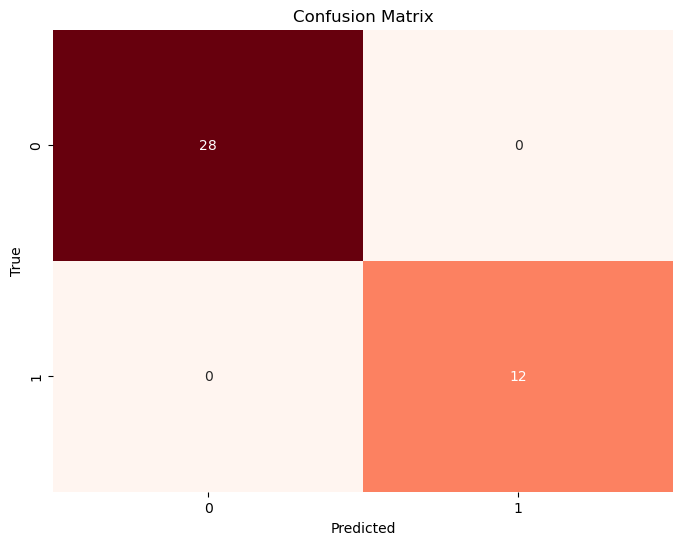

In [157]:
#plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [158]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  1.0 

 recall score:  1.0 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [159]:


#------------------------k-nearest neighbors (K-nn)-----------------------
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.1, random_state=42)

Knnmodel= KNeighborsClassifier()  
Knnmodel.fit(X_train_fs, y_train)
trainscore =  Knnmodel.score(X_train_fs,y_train)
testscore =  Knnmodel.score(X_test_fs,y_test)  

y_pred =  Knnmodel.predict(X_test_fs)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
cm1=confusion_matrix(y_test, y_pred)

cm1

 f1 score:  0.21052631578947364 



array([[23,  3],
       [12,  2]], dtype=int64)

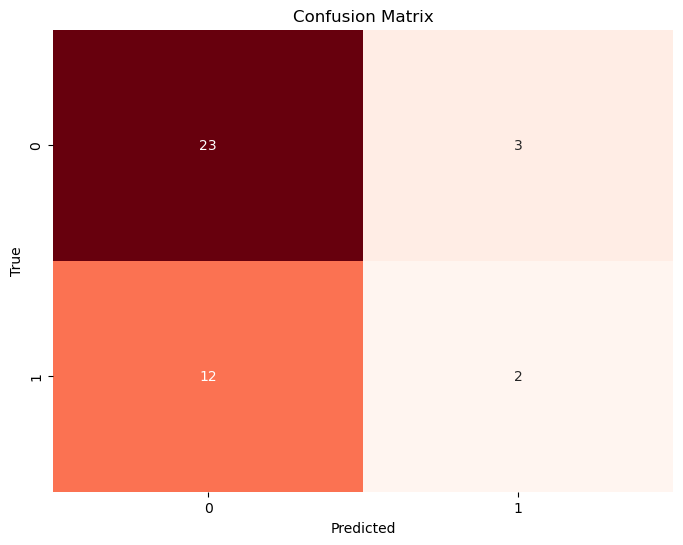

In [160]:
#plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [161]:


print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))



 precision score:  0.4 

 recall score:  0.14285714285714285 

              precision    recall  f1-score   support

         0.0       0.66      0.88      0.75        26
         1.0       0.40      0.14      0.21        14

    accuracy                           0.62        40
   macro avg       0.53      0.51      0.48        40
weighted avg       0.57      0.62      0.56        40



# NAIVE BAYES

In [162]:
#naive bayes
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.1, random_state=82)

NBmodel=  GaussianNB()  
NBmodel.fit(X_train_fs, y_train)
trainscore =  NBmodel.score(X_train_fs,y_train)
testscore =  NBmodel.score(X_test_fs,y_test)  

y_pred =  NBmodel.predict(X_test_fs)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  0.0 

[[19  5]
 [16  0]]


In [ ]:
# 
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))



# SUPPORT VECTOR CLASSIFICATION

In [164]:


#------------------------support vector classification-----------------------
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.1, random_state=187)

SVCmodel=  SVC(probability=True)  
SVCmodel.fit(X_train_fs, y_train)
trainscore =  SVCmodel.score(X_train_fs,y_train)
testscore =  SVCmodel.score(X_test_fs,y_test)  

y_pred =  SVCmodel.predict(X_test_fs)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))



 f1 score:  0.0 

[[27  0]
 [13  0]]


In [165]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  0.0 

 recall score:  0.0 

              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81        27
         1.0       0.00      0.00      0.00        13

    accuracy                           0.68        40
   macro avg       0.34      0.50      0.40        40
weighted avg       0.46      0.68      0.54        40



D:\kurulumlar\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\kurulumlar\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\kurulumlar\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\kurulumlar\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: 

# DECISION TREE


In [166]:


#------------------------Decision Tree-----------------------
X_train, X_test, y_train, y_test= train_test_split(X,y ,test_size= 0.1, random_state=78)

DTmodel=  DecisionTreeClassifier(max_depth=3)  
DTmodel.fit(X_train_fs, y_train)
trainscore =  DTmodel.score(X_train_fs,y_train)
testscore =  DTmodel.score(X_test_fs,y_test)  

y_pred =  DTmodel.predict(X_test_fs)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))



 f1 score:  0.5333333333333333 

[[18  5]
 [ 9  8]]


In [167]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  0.6153846153846154 

 recall score:  0.47058823529411764 

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72        23
         1.0       0.62      0.47      0.53        17

    accuracy                           0.65        40
   macro avg       0.64      0.63      0.63        40
weighted avg       0.64      0.65      0.64        40



# RANDOM FOREST

In [168]:


#------------------------Random Forest-----------------------
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.1, random_state=110)

RFmodel=  RandomForestClassifier(criterion='entropy',max_depth=3) 
RFmodel.fit(X_train_fs, y_train)
trainscore =  RFmodel.score(X_train_fs,y_train)
testscore =  RFmodel.score(X_test_fs,y_test)  

y_pred =  RFmodel.predict(X_test_fs)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))



 f1 score:  0.2857142857142857 

[[22  2]
 [13  3]]


In [169]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  0.6 

 recall score:  0.1875 

              precision    recall  f1-score   support

         0.0       0.63      0.92      0.75        24
         1.0       0.60      0.19      0.29        16

    accuracy                           0.62        40
   macro avg       0.61      0.55      0.52        40
weighted avg       0.62      0.62      0.56        40



In [170]:
#lets check roc auc 

AUC: 0.5052083333333334


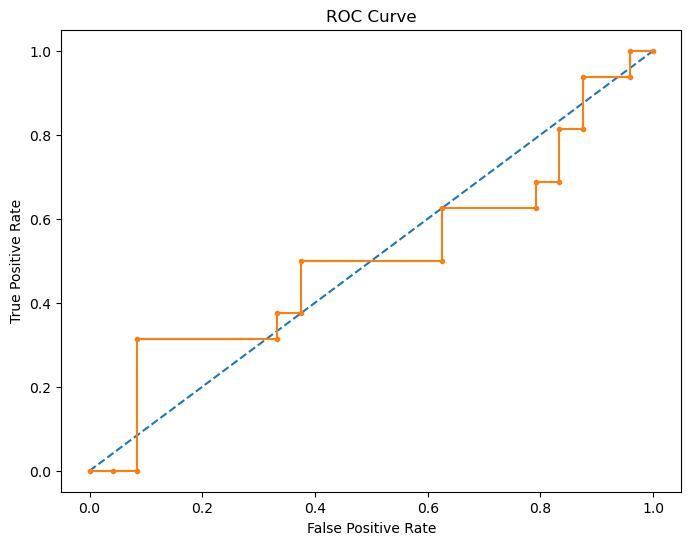

In [171]:
#logistic regression probability
probabilityValues = classimodel.predict_proba(X_test_fs)[:,1]

# Calculate AUC
auc = roc_auc_score(y_test, probabilityValues)
print("AUC:", auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilityValues)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

0.4830729166666667


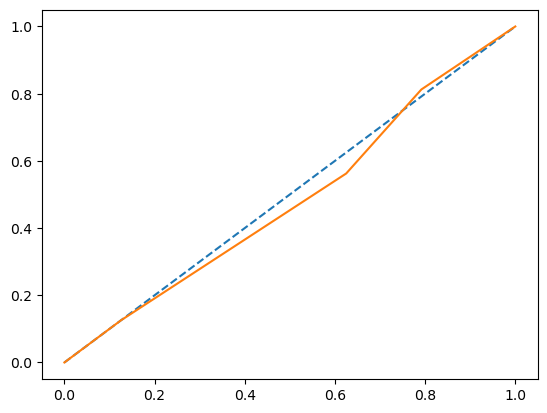

In [172]:
#knn probability roc auc

#------------------------k-nearest neighbors (K-nn)-----------------------
probabilityValues = Knnmodel.predict_proba(X_test_fs)[:,1]
#Calculate AUC
auc = roc_auc_score(y_test,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(y_test,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)



0.4869791666666667


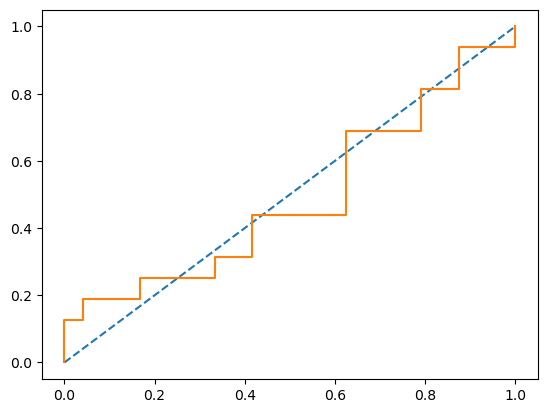

In [173]:
#naive bayes prob roc auc

#-------------------------------------- naive bayes -------------------------------------
probabilityValues = NBmodel.predict_proba(X_test_fs)[:,1]
#Calculate AUC
auc = roc_auc_score(y_test,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(y_test,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)



0.41406249999999994


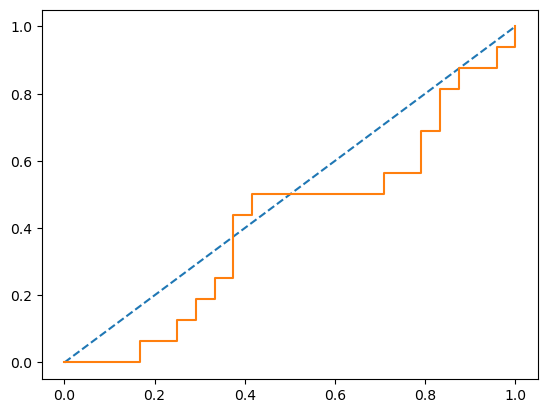

In [174]:
#svm roc auc probability
#-------------------------------------- support vector classification -------------------------------------
probabilityValues = SVCmodel.predict_proba(X_test_fs)[:,1]
#Calculate AUC
auc = roc_auc_score(y_test,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(y_test,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.38671874999999994


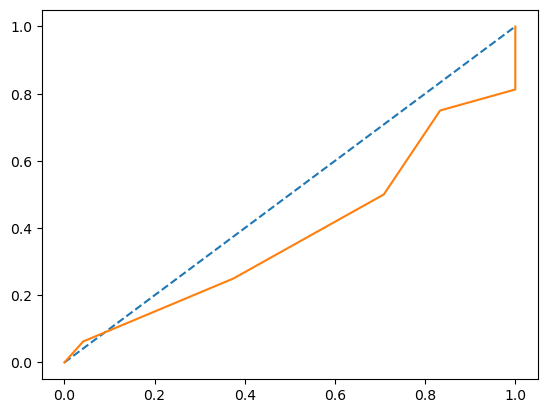

In [175]:
#decision tree roc auc probability
#-------------------------------------- Decision Tree -------------------------------------
probabilityValues = DTmodel.predict_proba(X_test_fs)[:,1]
#Calculate AUC
auc = roc_auc_score(y_test,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(y_test,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.5442708333333333


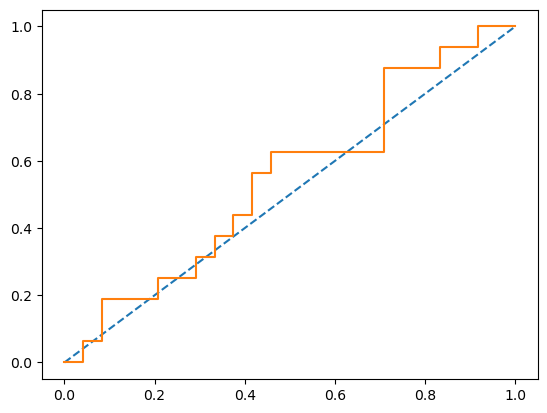

In [176]:
#random forest roc auc probability
#-------------------------------------- Random Forest -------------------------------------
probabilityValues = RFmodel.predict_proba(X_test_fs)[:,1]
#Calculate AUC
auc = roc_auc_score(y_test,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(y_test,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)